Find and plot the temperature gradient and the shock direction.
NB: problems in plotting due to the scale of ax.quiver.
NB: you produce and save plot not txt or other data

In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import Utilities.prelude

from Utilities.operators import make_tree, calc_grad

In [2]:
gamma = 5/3
mach_min = 1.3
save = False
folder = 'sedov'
snap = '100'
path = f'{folder}/{snap}'

if folder == 'TDE':
    is_tde = True
    threshold = 7_000
else:
    is_tde = False
    threshold = 0.99

In [3]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, Den, Press, Temp = make_tree(path, snap, is_tde)
dim_cell = (3*Vol/(4*np.pi))**(1/3)

all T=0, bro. Compute by myself!


In [4]:
def shock_direction(sim_tree, X, Y, Z, Temp, point, delta):
    """ Find shock direction according eq.(5) by Schaal14 in the point of coordinates indices idx.
    Parameters
    -----------
    sim_tree: tree.
            Simulation points.
    X, Y, Z, Temp: arrays.
            Coordinates and temperature of the points of the tree.
    point: array.
            Starting point.
    delta: float.
            Step between 2 neighbours.
    Returns
    -----------
    grad: array.
        Gradient of temperature(vector of 3 components).
    ds: array.
        Shock direction (vector of 3 components).
    """
    grad = calc_grad(sim_tree, X, Y, Z, Temp, point, delta)
    magnitude = np.linalg.norm(grad)
    
    if np.linalg.norm(grad) <1e-3:#np.logical_and(np.abs(grad[0])<1, np.logical_and(np.abs(grad[1])<1, np.abs(grad[2])<1)):
        ds = np.zeros(3)
    else:
        ds = - np.divide(grad,magnitude)

    return grad, ds

In [5]:
# - gradient of T
gradx = np.zeros(len(X))
grady = np.zeros(len(X))
ds_x = np.zeros(len(X))
ds_y = np.zeros(len(X))
X_cell = np.zeros(len(X)) 
Y_cell = np.zeros(len(X))
Z_cell = np.zeros(len(X))

for i in range(len(X)):
    point = [X[i],Y[i],Z[i]]
    step = 2*dim_cell[i]
    grad, ds = shock_direction(sim_tree, X, Y, Z, Temp, point, step)

    gradx[i] = -grad[0]
    grady[i] = -grad[1]
    ds_x[i] = ds[0]
    ds_y[i] = ds[1]

lots of iterations for div/grad in x for point [0.9846727229184836, -0.9784994836514505, 0.9739032483704327]. Skip
lots of iterations for div/grad in y for point [0.9469459998857722, -0.9875541957914218, 0.9727377629519905]. Skip
lots of iterations for div/grad in z for point [0.9769863535586245, -0.9366042569866389, 0.9854137380963003]. Skip
lots of iterations for div/grad in x for point [0.9851227549875593, -0.9733180835672486, 0.8706006495765375]. Skip
lots of iterations for div/grad in x for point [0.9834954334718514, -0.8025546051704473, 0.913371155629031]. Skip
lots of iterations for div/grad in y for point [0.8566247163862551, -0.9872271953625124, 0.9422480372526587]. Skip
lots of iterations for div/grad in z for point [0.6640505087103358, -0.7436482429843808, 0.9868499801090281]. Skip
lots of iterations for div/grad in z for point [0.6745168091637577, -0.9330963171308587, 0.9872771659048841]. Skip
lots of iterations for div/grad in y for point [0.6731607069288786, -0.9850796146

In [6]:
z_chosen = 0
if folder == 'sedov':
    delta_cs = 0.02
else:
    delta_cs = 2

In [7]:
# Cross section 
x_cross = []
y_cross = []
dsx_cross = []
dsy_cross = []
flat_T = []

gradx_cross = []
grady_cross = []

for i,z_val in enumerate(Z):
    if np.abs(z_val-z_chosen) < delta_cs:
        x_cross.append(X[i])
        y_cross.append(Y[i])
        flat_T.append(Temp[i])
        gradx_cross.append(gradx[i])
        grady_cross.append(grady[i])
        dsx_cross.append(ds_x[i])
        dsy_cross.append(ds_y[i])

T_cross = np.log10(flat_T)
T_cross = np.nan_to_num(T_cross, neginf = 0)

x_cross = np.array(x_cross)
y_cross = np.array(y_cross)
gradx_cross = np.array(gradx_cross)
grady_cross = np.array(grady_cross)


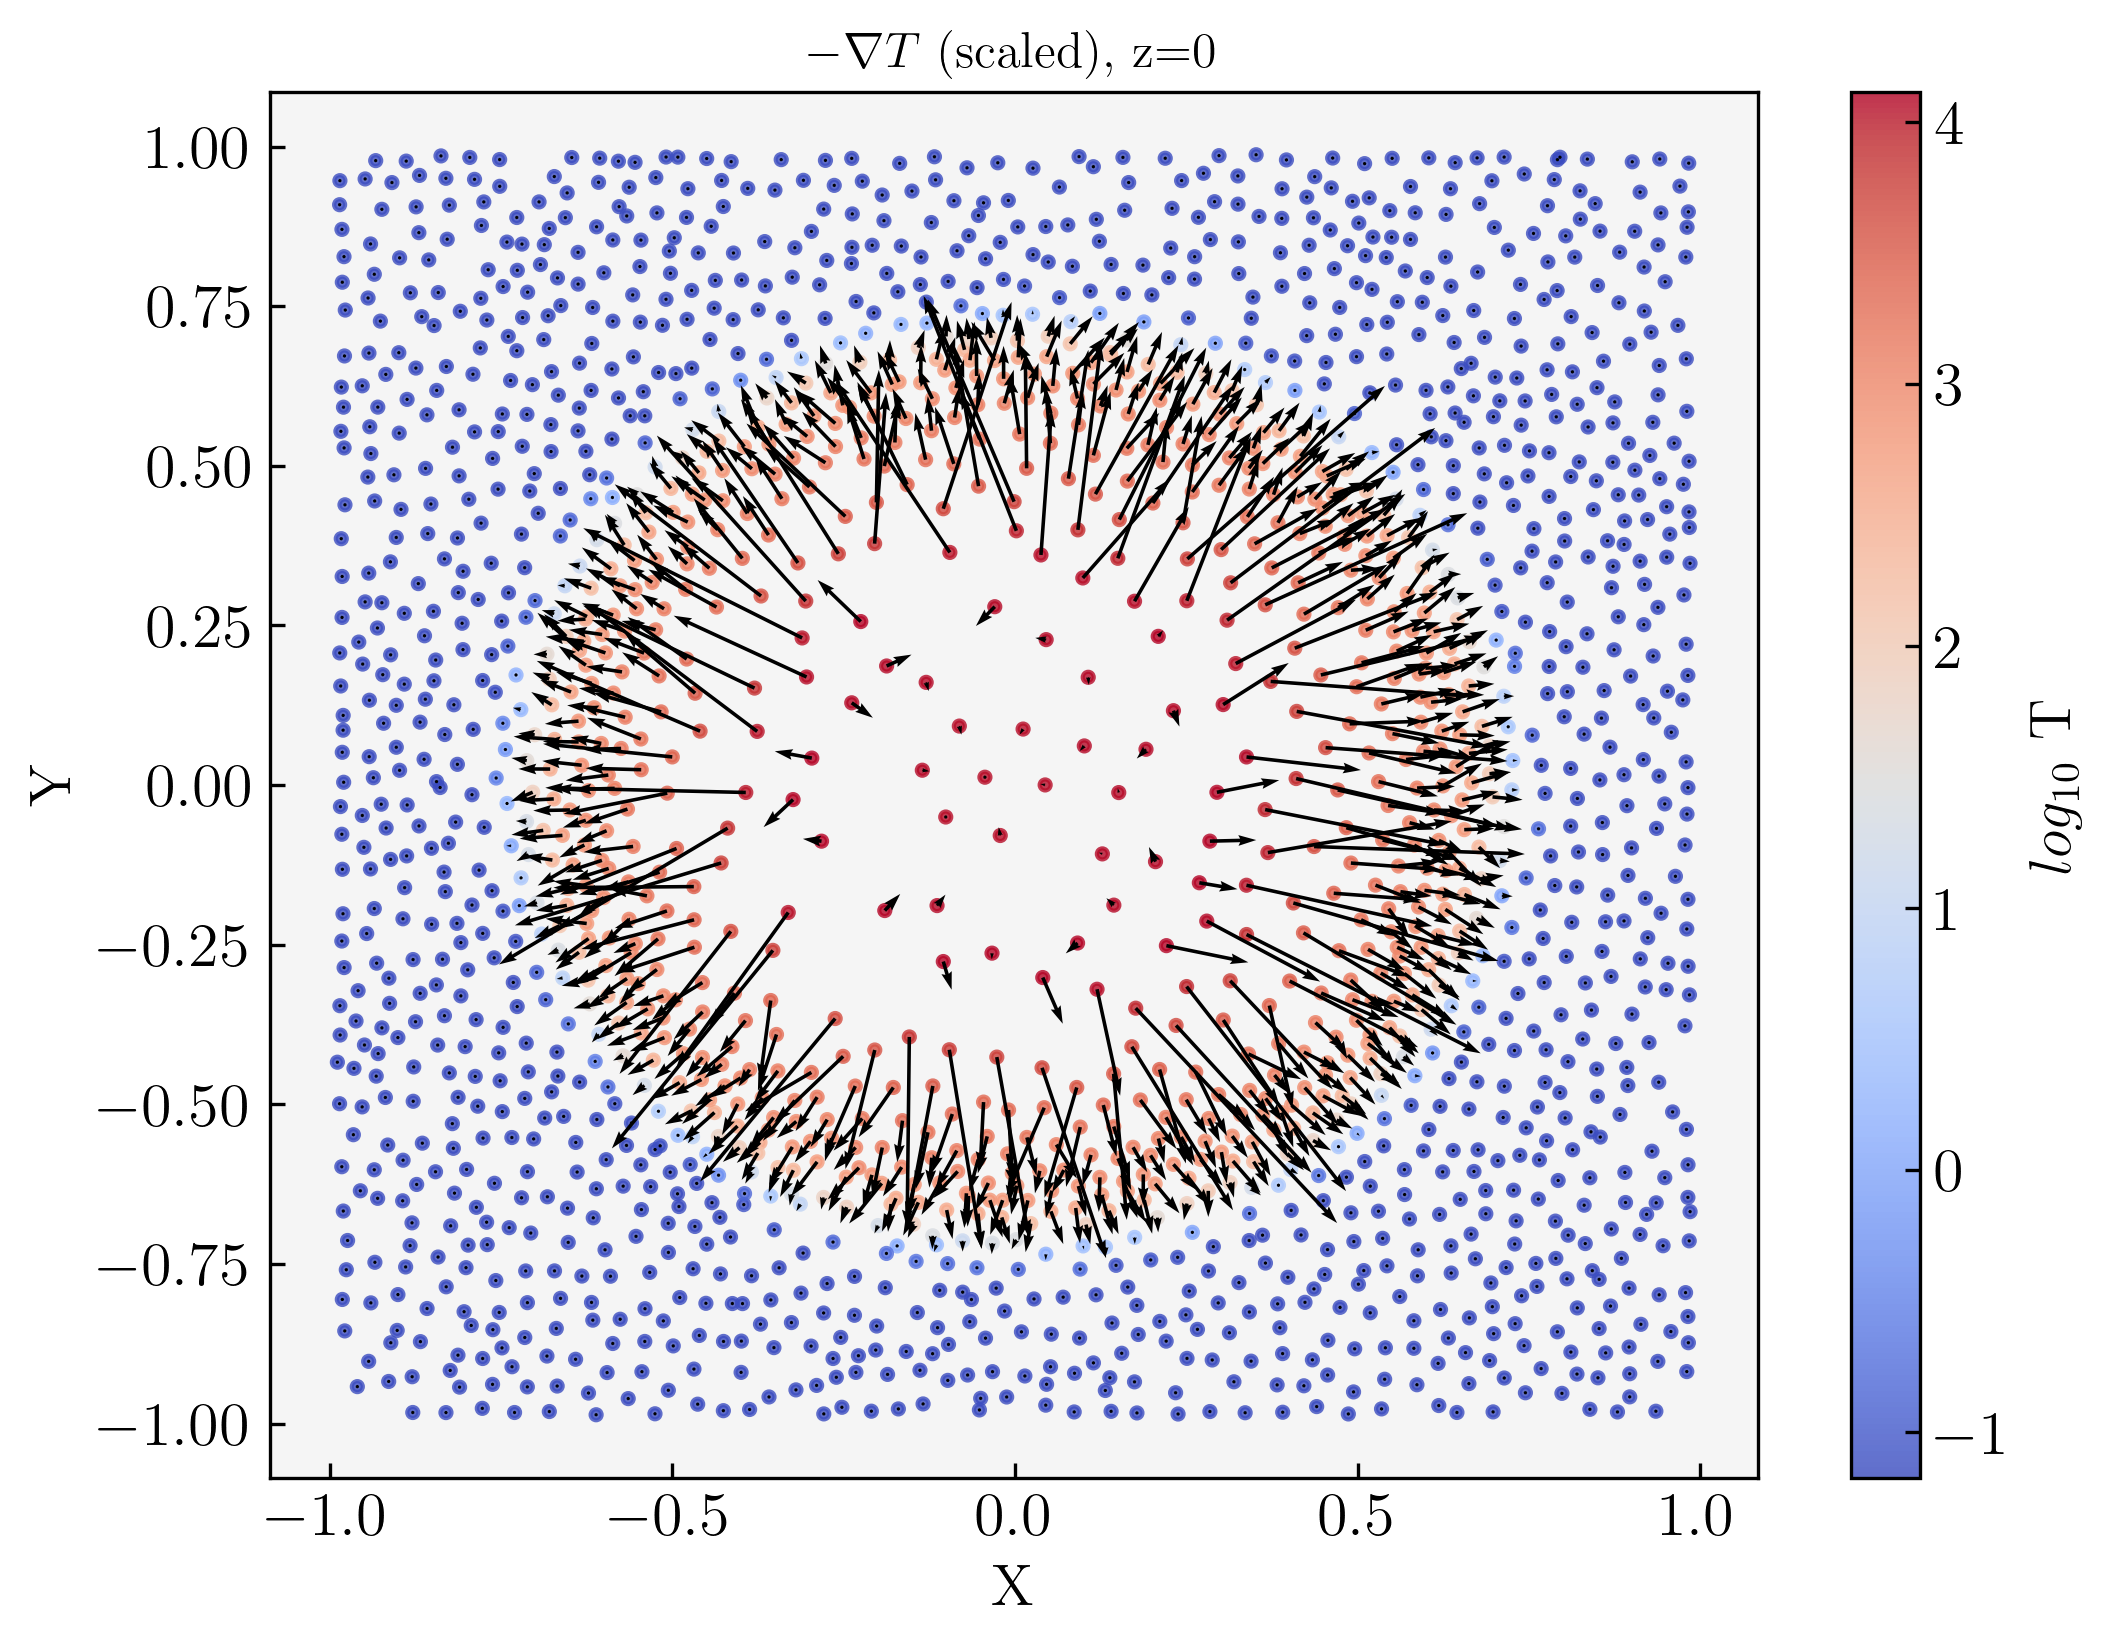

In [13]:
# - Gradient T
fig, ax = plt.subplots(1,1)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
img = ax.scatter(x_cross, y_cross, c = T_cross, s = 7, cmap = 'coolwarm', alpha =0.8)
cb = plt.colorbar(img)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax.quiver(x_cross, y_cross, gradx_cross, grady_cross, color = 'k', angles='xy', scale_units='xy')
plt.title(r'$-\nabla T$ (scaled), ' f'z={z_chosen}')
plt.savefig(f'Figs/{snap}/Tslice_grad_{snap}.png')

Now we do the same thing but with shock direction (i.e. (opposite of the) gradient of temperature normalised)

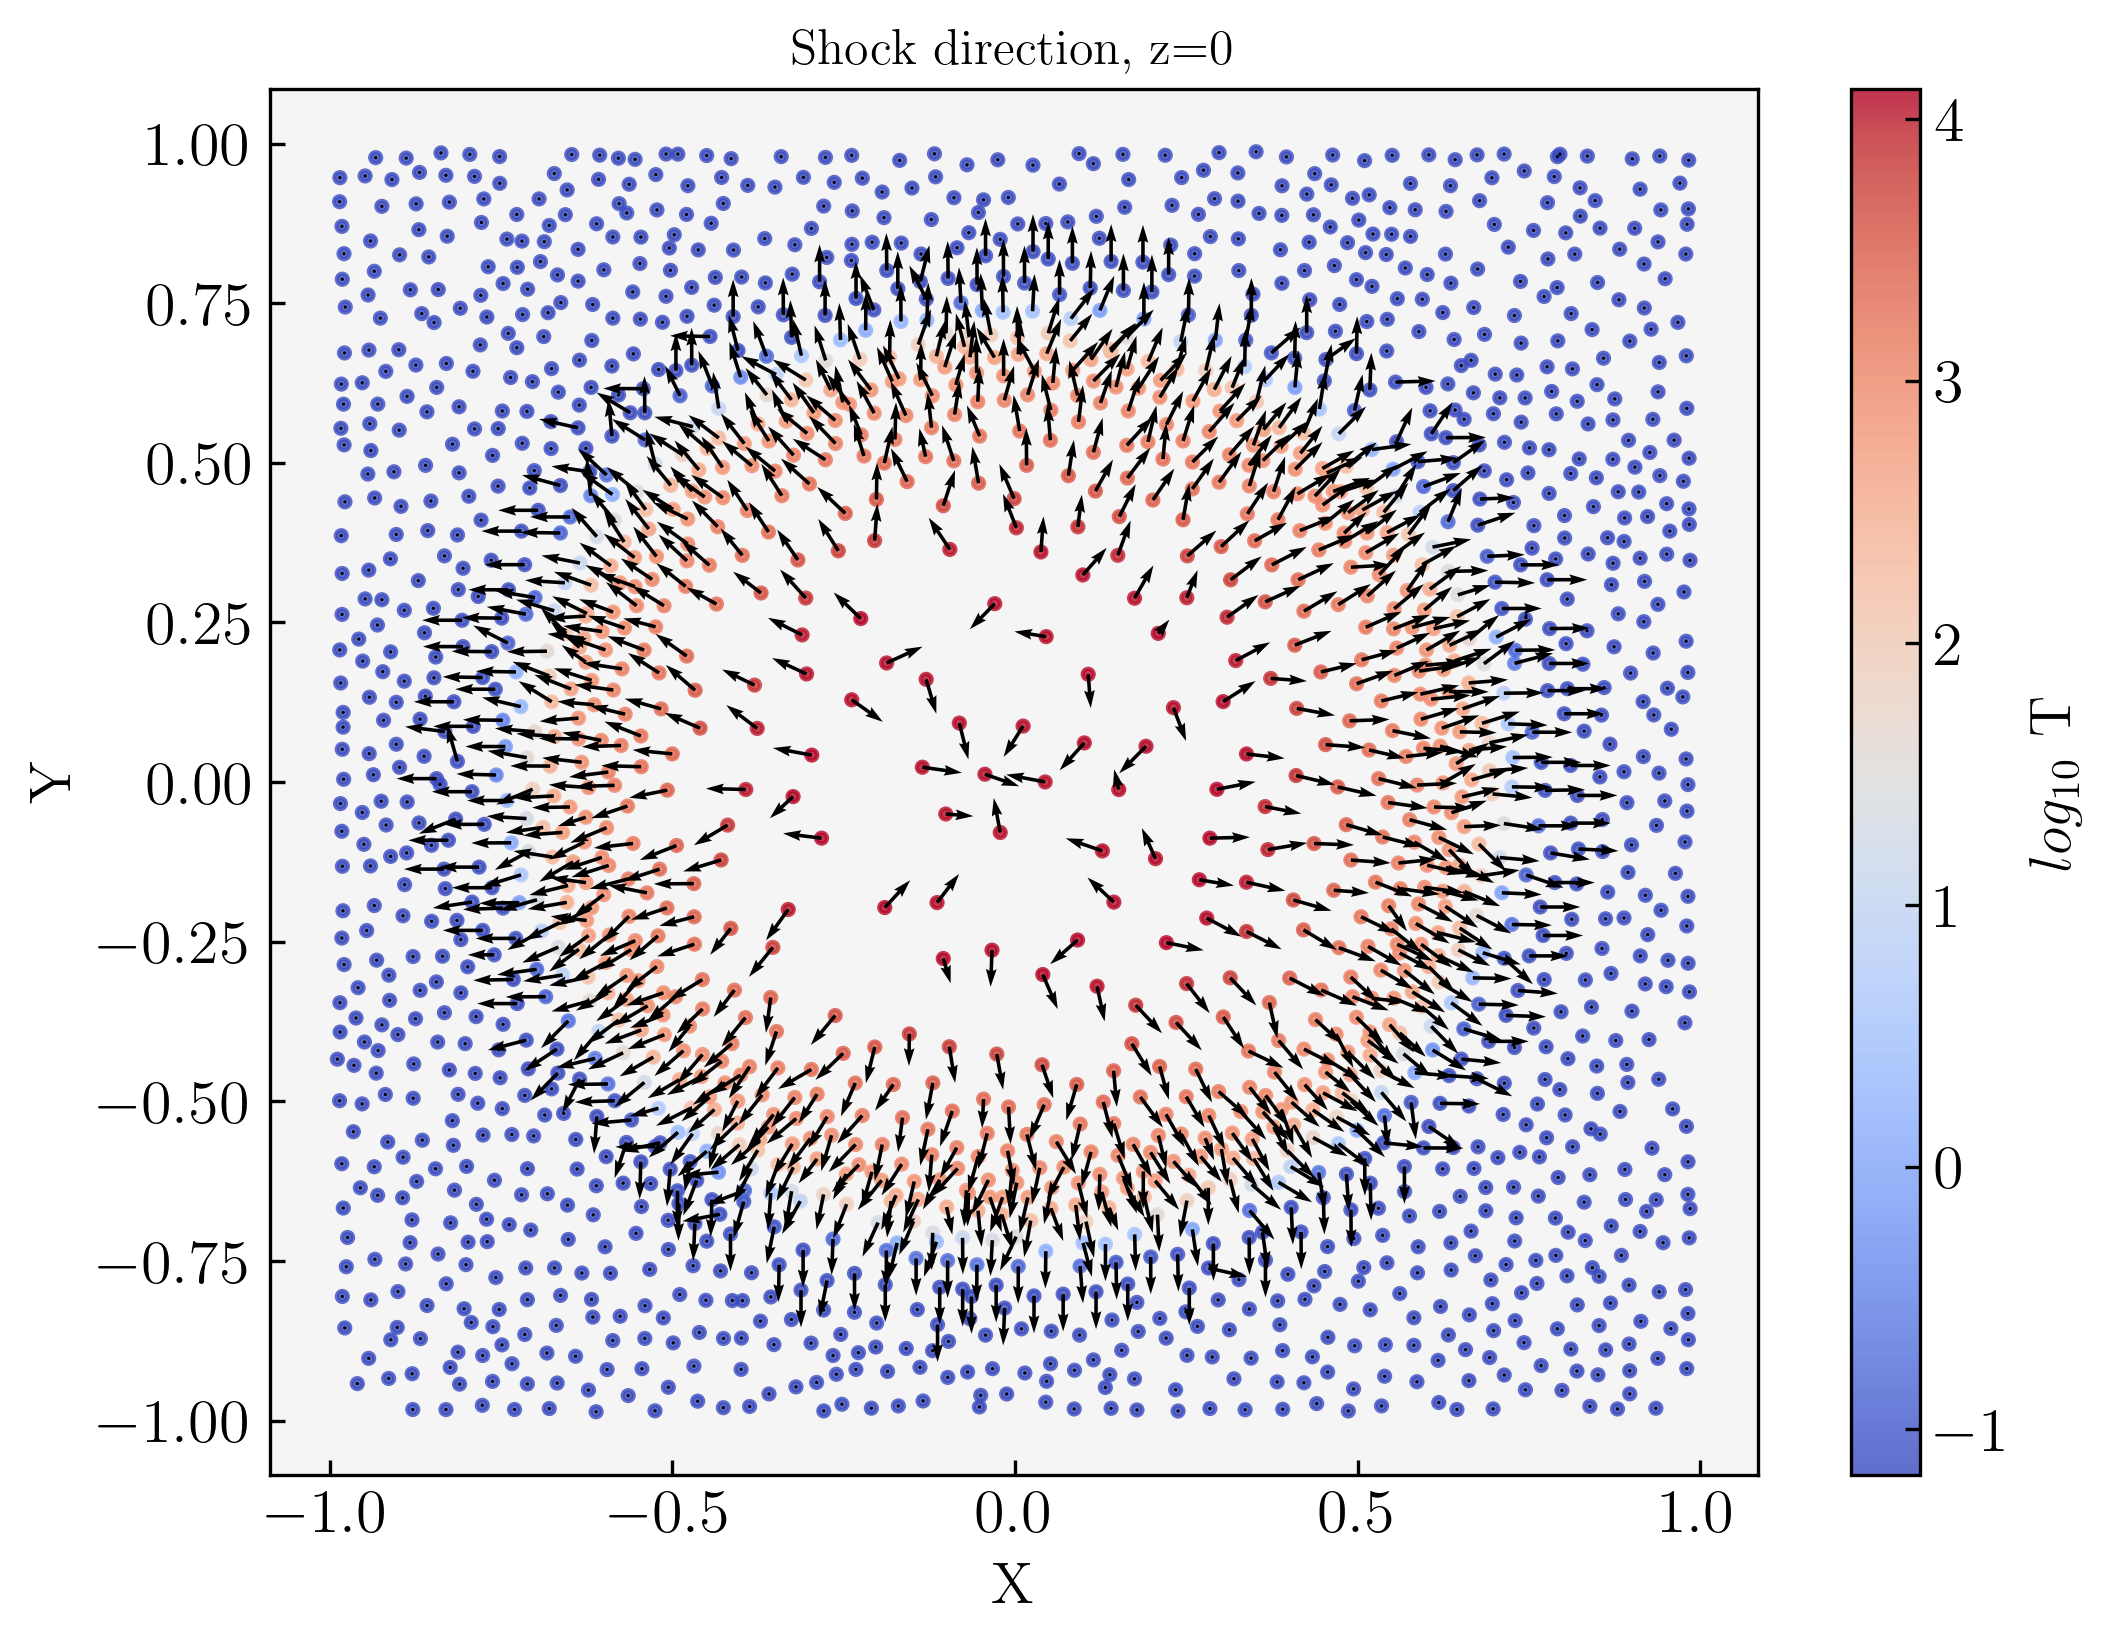

In [9]:
# Shock direction plot
fig1, ax1 = plt.subplots(1,1)
ax1.set_xlabel('X', fontsize = 14)
ax1.set_ylabel('Y', fontsize = 14)
img1 = ax1.scatter(x_cross, y_cross, c = T_cross, s = 7, cmap = 'coolwarm', alpha = 0.8)
cb = plt.colorbar(img1)
#plt.xlim(-0.5,0)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax1.quiver(x_cross, y_cross, dsx_cross, dsy_cross, color = 'k', angles='xy', scale_units='xy')
plt.title(f'Shock direction, z={z_chosen}')
plt.savefig(f'Figs/{snap}/shockDir_z{z_chosen}_{snap}.png')